In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from airsenal.framework.utils import *
from airsenal.framework.prediction_utils import fit_bonus_points

In [2]:
query = (
    session.query(PlayerScore)
)


In [3]:
df = pd.read_sql(query.statement, engine)
df.head()

,id,player_team,opponent,points,goals,assists,bonus,conceded,minutes,player_id,...,penalties_saved,penalties_missed,yellow_cards,red_cards,saves,bps,influence,creativity,threat,ict_index
0,1,SOU,BUR,0,0,0,0,0,0,415,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
1,2,SOU,LIV,0,0,0,0,0,0,415,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
2,3,SOU,BHA,0,0,0,0,0,0,415,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
3,4,SOU,MUN,0,0,0,0,0,0,415,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
4,5,SOU,SHU,0,0,0,0,0,0,415,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0


In [4]:
df_more60, df_less60, df_less30 = fit_bonus_points()

In [5]:
df_more60.sort_values(ascending=False).head(20)

player_id
302     1.285714
1024    1.153846
315     1.076923
831     1.017241
4       0.974026
268     0.909091
366     0.905660
460     0.901408
388     0.900000
224     0.870000
282     0.860465
272     0.857143
1005    0.833333
436     0.833333
256     0.800000
275     0.765625
709     0.739130
259     0.737500
627     0.733333
91      0.729730
Name: bonus, dtype: float64

In [6]:
df_less60.sort_values(ascending=False).head(20)

player_id
306     0.600000
6       0.583333
224     0.500000
229     0.500000
359     0.307692
522     0.300000
918     0.300000
506     0.300000
1096    0.300000
365     0.300000
944     0.300000
118     0.300000
609     0.300000
755     0.300000
233     0.294118
282     0.250000
366     0.200000
53      0.200000
626     0.200000
136     0.200000
Name: bonus, dtype: float64

In [7]:
df_less30.sort_values(ascending=False).head(20)

player_id
4       0.600000
755     0.352941
130     0.300000
801     0.300000
343     0.300000
140     0.300000
91      0.250000
6       0.250000
927     0.250000
638     0.210526
892     0.200000
1098    0.200000
254     0.200000
526     0.200000
944     0.200000
276     0.200000
272     0.200000
416     0.181818
249     0.181818
315     0.176471
Name: bonus, dtype: float64

In [30]:
idx = 4
get_player(idx).name

'Pierre-Emerick Aubameyang'

KeyboardInterrupt: 

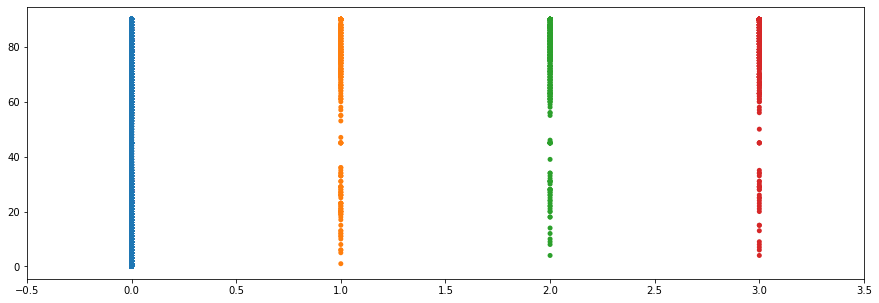

In [50]:
aub = df[df.player_id == idx]
plt.figure(figsize=(15,5))
sns.swarmplot(x="bonus", y="minutes", data=aub)

<AxesSubplot:ylabel='Frequency'>

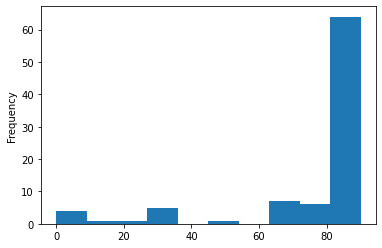

In [32]:
df[df.player_id == idx].minutes.plot.hist()

<AxesSubplot:xlabel='minutes'>

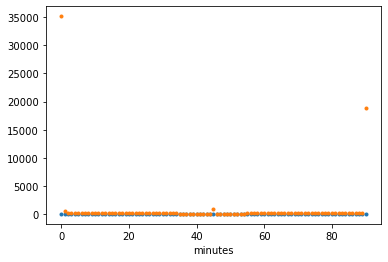

In [19]:
df.groupby("minutes").bonus.mean().plot(linestyle='None', marker='.')


(0.0, 250.0)

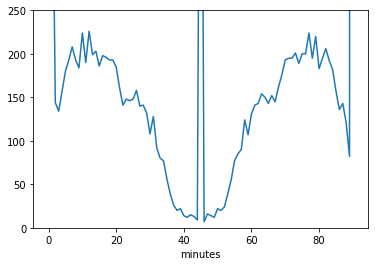

In [29]:
df.groupby("minutes").bonus.count().plot()
plt.ylim([0, 250])

<AxesSubplot:xlabel='minutes'>

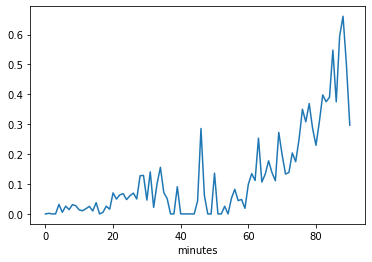

In [33]:
df.groupby("minutes").bonus.mean().plot()


<AxesSubplot:xlabel='minutes'>

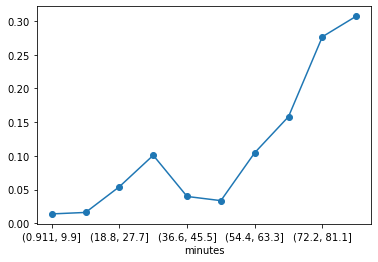

In [40]:
bins = pd.cut(df.loc[df.minutes>0, "minutes"],bins=10)
df[df.minutes>0].groupby(bins).bonus.mean().plot(marker='o')

In [41]:
6/22

0.2727272727272727

In [47]:
players = pd.read_sql(session.query(Player).statement, engine)
players.head()

,player_id,name
0,1,Mesut Özil
1,2,Sokratis Papastathopoulos
2,3,David Luiz Moreira Marinho
3,4,Pierre-Emerick Aubameyang
4,5,Cédric Soares


In [48]:
players = players.join(df_more60, on="player_id")
players.set_index("player_id")

,name,bonus
player_id,,
1,Mesut Özil,0.355932
2,Sokratis Papastathopoulos,0.209302
3,David Luiz Moreira Marinho,0.386667
4,Pierre-Emerick Aubameyang,0.974026
5,Cédric Soares,0.190476
...,...,...
1151,Josh Cullen,NaN
1152,João Mário Naval Costa Eduardo,0.454545
1153,Patrice Evra,0.000000


In [49]:
players.sort_values(by="bonus", ascending=False).head(50)

,player_id,name,bonus
301,302,Bruno Miguel Borges Fernandes,1.285714
1023,1024,Philippe Coutinho,1.153846
314,315,Mason Greenwood,1.076923
830,831,Eden Hazard,1.017241
3,4,Pierre-Emerick Aubameyang,0.974026
267,268,Sergio Agüero,0.909091
365,366,Danny Ings,0.905660
459,460,Raúl Jiménez,0.901408
387,388,Harry Kane,0.900000
223,224,Jamie Vardy,0.870000
